### Module to collect  gridded UV and temperature data

In [1]:
# General dependencies
import datetime as dt
import pandas as pd

# APIs dependencies
import json
import requests
from pprint import pprint
from resources.api_keys import owm_api_key as owm_key

# Mapping dependencies
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt

# API endpoint
url_hstr = 'https://api.openweathermap.org/data/2.5/uvi/history?'
url_fcst = 'https://api.openweathermap.org/data/2.5/onecall?'
units = 'metric'

### Grid

In [2]:
# Generate grid with timestamps 8 days
def grid_dte_pnts():
    
    # Empty list to grid locations
    grid_list = []


    # Generate list of grid pairs and timestamps
    
    # Western Australia
    # latitude range -36 to -12 deg south
    # longitude range 110 to 130 deg east

    lat_rng = [-36, -12]
    lon_rng = [112, 130]
    dte_stt = int(dt.datetime.strptime('2020-01-13 12:00:00 UTC', '%Y-%m-%d %H:%M:%S %Z').timestamp())
    dte_cnt = 8
      
       
    for dte in range(dte_stt, dte_stt + dte_cnt*(86400), 86400):
        for lat in range(lat_rng[0], lat_rng[1] + 1, 4):
            for lon in range(lon_rng[0], lon_rng[1] + 1, 4):

                grid_pt = [lat, lon, dte]

                # Append to list
                grid_list.append(grid_pt)

    return grid_list

In [3]:
# Generate grid 
def grid_pnts():
    
    # Empty list to grid locations
    grid_list = []


    # Generate list of grid pairs 
    
    # Australia
    # latitude range -45 to -8 deg south
    # longitude range 110 to 156 deg east

    lat_rng = [-36, -12]
    lon_rng = [112, 130]
     
       
    for lat in range(lat_rng[0], lat_rng[1] + 1, 4):
        for lon in range(lon_rng[0], lon_rng[1] + 1, 4):

            grid_pt = [lat, lon]

            # Append to list
            grid_list.append(grid_pt)

    return grid_list

### API calls and json file creation

In [4]:
# Partial query URL
qery_url_hstr = f'{url_hstr}&appid={owm_key}'

# Empty variables to hold response
hstr_data = {}
hstr_data['date'] = []
hstr_data['latitude'] = []
hstr_data['longitude'] = []
hstr_data['uv-index'] = []

# uv index - historical data
# Loop through the grid and perform a request for data on each
# Call function 'grid_pnts' to provide coordinates
for locn in grid_dte_pnts():  

    print(f'... {locn} ...')
    
    # If location in OWM database then collect data
    try:
        
        # request uv index data for location
        response = requests.get(qery_url_hstr + '&lat=' + str(locn[0]) + '&lon=' + str(locn[1])  + '&start=' + str(locn[2]) + '&end=' + str(locn[2])).json()
        
        # append to json string
        hstr_data['date'].append(dt.datetime.utcfromtimestamp(response[0]['date']).strftime('%Y-%m-%d %H:%M'))
        hstr_data['latitude'].append(response[0]['lat'])
        hstr_data['longitude'].append(response[0]['lon'])
        hstr_data['uv-index'].append(response[0]['value'])

    # If location not in OWM database then report to log and skip to next location
    except KeyError:
        print(f'  {locn} not found ...skipping...')

# write json to file
with open('analysis/hstr_data.json', 'w') as outfile:
    json.dump(hstr_data, outfile)        

# print to terminal
pprint(hstr_data)
print(f'  Finished data collection')

... [-36, 112, 1578888000] ...
... [-36, 116, 1578888000] ...
... [-36, 120, 1578888000] ...
... [-36, 124, 1578888000] ...
... [-36, 128, 1578888000] ...
... [-32, 112, 1578888000] ...
... [-32, 116, 1578888000] ...
... [-32, 120, 1578888000] ...
... [-32, 124, 1578888000] ...
... [-32, 128, 1578888000] ...
... [-28, 112, 1578888000] ...
... [-28, 116, 1578888000] ...
... [-28, 120, 1578888000] ...
... [-28, 124, 1578888000] ...
... [-28, 128, 1578888000] ...
... [-24, 112, 1578888000] ...
... [-24, 116, 1578888000] ...
... [-24, 120, 1578888000] ...
... [-24, 124, 1578888000] ...
... [-24, 128, 1578888000] ...
... [-20, 112, 1578888000] ...
... [-20, 116, 1578888000] ...
... [-20, 120, 1578888000] ...
... [-20, 124, 1578888000] ...
... [-20, 128, 1578888000] ...
... [-16, 112, 1578888000] ...
... [-16, 116, 1578888000] ...
... [-16, 120, 1578888000] ...
... [-16, 124, 1578888000] ...
... [-16, 128, 1578888000] ...
... [-12, 112, 1578888000] ...
... [-12, 116, 1578888000] ...
... [-12

... [-20, 112, 1579492800] ...
... [-20, 116, 1579492800] ...
... [-20, 120, 1579492800] ...
... [-20, 124, 1579492800] ...
... [-20, 128, 1579492800] ...
... [-16, 112, 1579492800] ...
... [-16, 116, 1579492800] ...
... [-16, 120, 1579492800] ...
... [-16, 124, 1579492800] ...
... [-16, 128, 1579492800] ...
... [-12, 112, 1579492800] ...
... [-12, 116, 1579492800] ...
... [-12, 120, 1579492800] ...
... [-12, 124, 1579492800] ...
... [-12, 128, 1579492800] ...
{'date': ['2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:00',
          '2020-01-13 12:

In [5]:
# Partial query URL
qery_url_fcst = f'{url_fcst}&appid={owm_key}&exclude=minutely,hourly,alerts&units={units}'

# Empty variables to hold response
fcst_data = {}
fcst_data['date'] = []
fcst_data['latitude'] = []
fcst_data['longitude'] = []
fcst_data['uv-index'] = [] 
fcst_data['max-temperature'] = [] 

# uv and temp forecast
# Loop through the grid and perform a request for data on each
# Call function 'grid_pnts' to provide coordinates
for locn in grid_pnts():  

    print(f'... {locn} ...')
    
    # If location in OWM database then collect data
    try:
        
        # request uv and temperature data for location
        response = requests.get(qery_url_fcst + '&lat=' + str(locn[0]) + '&lon=' + str(locn[1])).json()
        
        # append forecasts to json string
        for fcst in response['daily']:
#             fcst_data['forecast'].append({'dte': dt.datetime.utcfromtimestamp(fcst['dt']).strftime('%Y-%m-%d %H:%M'),
#                          'lat': response['lat'],
#                          'lon': response['lon'],
#                          'tmp': fcst['temp']['max'],
#                          'uvi': fcst['uvi']
#                          })
            
            # append to json string
            fcst_data['date'].append(dt.datetime.utcfromtimestamp(fcst['dt']).strftime('%Y-%m-%d %H:%M'))
            fcst_data['latitude'].append(response['lat'])
            fcst_data['longitude'].append(response['lon'])
            fcst_data['uv-index'].append(fcst['uvi'])
            fcst_data['max-temperature'].append(fcst['temp']['max'])

    # If location not in OWM database then report to log and skip to next location
    except KeyError:
        print(f'  {locn} not found ...skipping...')

# write json to file
with open('analysis/fcst_data.json', 'w') as outfile:
    json.dump(fcst_data, outfile)
        
# print to terminal
pprint(fcst_data)
print(f'  Finished data collection')

... [-36, 112] ...
... [-36, 116] ...
... [-36, 120] ...
... [-36, 124] ...
... [-36, 128] ...
... [-32, 112] ...
... [-32, 116] ...
... [-32, 120] ...
... [-32, 124] ...
... [-32, 128] ...
... [-28, 112] ...
... [-28, 116] ...
... [-28, 120] ...
... [-28, 124] ...
... [-28, 128] ...
... [-24, 112] ...
... [-24, 116] ...
... [-24, 120] ...
... [-24, 124] ...
... [-24, 128] ...
... [-20, 112] ...
... [-20, 116] ...
... [-20, 120] ...
... [-20, 124] ...
... [-20, 128] ...
... [-16, 112] ...
... [-16, 116] ...
... [-16, 120] ...
... [-16, 124] ...
... [-16, 128] ...
... [-12, 112] ...
... [-12, 116] ...
... [-12, 120] ...
... [-12, 124] ...
... [-12, 128] ...
{'date': ['2021-01-13 04:00',
          '2021-01-14 04:00',
          '2021-01-15 04:00',
          '2021-01-16 04:00',
          '2021-01-17 04:00',
          '2021-01-18 04:00',
          '2021-01-19 04:00',
          '2021-01-20 04:00',
          '2021-01-13 04:00',
          '2021-01-14 04:00',
          '2021-01-15 04:00',
     

### Dataframe

In [6]:
# Dataframe
hstr_data_df = pd.read_json('analysis/hstr_data.json')

# Output to CSV file
hstr_data_df.to_csv('analysis/hstr_data.csv', index=False)

# Display
hstr_data_df

,date,latitude,longitude,uv-index
0,2020-01-13 12:00:00,-36,112,12.52
1,2020-01-13 12:00:00,-36,116,12.34
2,2020-01-13 12:00:00,-36,120,12.24
3,2020-01-13 12:00:00,-36,124,12.46
4,2020-01-13 12:00:00,-36,128,12.48
...,...,...,...,...
275,2020-01-20 12:00:00,-12,112,14.63
276,2020-01-20 12:00:00,-12,116,15.55
277,2020-01-20 12:00:00,-12,120,14.62
278,2020-01-20 12:00:00,-12,124,14.34


In [7]:
# Dataframe
fcst_data_df = pd.read_json('analysis/fcst_data.json')

# Output to CSV file
fcst_data_df.to_csv('analysis/fcst_data.csv', index=False)

# Display
fcst_data_df

,date,latitude,longitude,uv-index,max-temperature
0,2021-01-13 04:00:00,-36,112,12.37,15.42
1,2021-01-14 04:00:00,-36,112,11.76,17.32
2,2021-01-15 04:00:00,-36,112,8.70,17.35
3,2021-01-16 04:00:00,-36,112,8.64,17.23
4,2021-01-17 04:00:00,-36,112,12.32,17.85
...,...,...,...,...,...
275,2021-01-16 03:00:00,-12,128,13.92,30.43
276,2021-01-17 03:00:00,-12,128,14.29,30.50
277,2021-01-18 03:00:00,-12,128,15.00,30.12
278,2021-01-19 03:00:00,-12,128,15.00,30.04


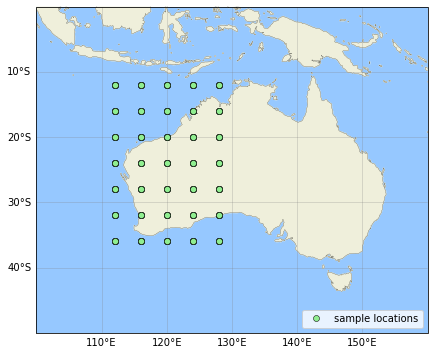

In [8]:
# Display sample cities on a map to verify (random) distribution

# Data
x_axis = hstr_data_df['longitude']
y_axis = hstr_data_df['latitude']

# Cartopy base map - https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/geoaxes.html
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,6))
#ax.set_global()  # show maximum extent supported by this projection
ax.set_extent([100, 160, -50, 0], crs=ccrs.PlateCarree())
ax.set_facecolor((150/255, 200/255, 255/255))  # background colour of plot
ax.coastlines(lw=0.2)  # lightly define coastlines
ax.add_feature(cartopy.feature.LAND)  # mask over background with land shape

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.top_labels = False
gl.right_labels = False

# Plot city locations
ax.plot(x_axis, y_axis, 'bo', ms=6, mfc='lightgreen', mec='black', mew=0.5, label='sample locations')
ax.legend(loc='lower right');
